<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisPredictivo/blob/master/08_NLP/Isomap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # for data manipulation

# Visualization
import plotly.express as px # for data visualization
import matplotlib.pyplot as plt # for showing handwritten digits

# Skleran
from sklearn.datasets import load_digits # for MNIST data
from sklearn.manifold import Isomap # for Isomap dimensionality reduction

In [2]:
# Load digits data 
digits = load_digits()

# Load arrays containing digit data (64 pixels per image) and their true labels
X, y = load_digits(return_X_y=True)

# Some stats
print('Shape of digit images: ', digits.images.shape)
print('Shape of X (training data): ', X.shape)
print('Shape of y (true labels): ', y.shape)

Shape of digit images:  (1797, 8, 8)
Shape of X (training data):  (1797, 64)
Shape of y (true labels):  (1797,)


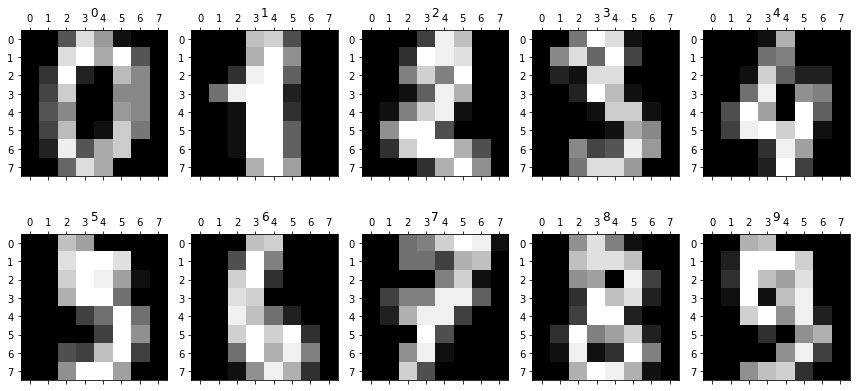

In [3]:
# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
plt.gray() 
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(digits.images[n])
        axs[i,j].set(title=y[n])
        n=n+1
plt.show() 

In [10]:
### Step 1 - Configure the Isomap function, note we use default hyperparameter values in this example
embed3 = Isomap(
    n_neighbors=5, # default=5, algorithm finds local structures based on the nearest neighbors
    n_components=3, # number of dimensions
    eigen_solver='auto', # {‘auto’, ‘arpack’, ‘dense’}, default=’auto’
    tol=0, # default=0, Convergence tolerance passed to arpack or lobpcg. not used if eigen_solver == ‘dense’.
    max_iter=None, # default=None, Maximum number of iterations for the arpack solver. not used if eigen_solver == ‘dense’.
    path_method='auto', # {‘auto’, ‘FW’, ‘D’}, default=’auto’, Method to use in finding shortest path.
    neighbors_algorithm='auto', # neighbors_algorithm{‘auto’, ‘brute’, ‘kd_tree’, ‘ball_tree’}, default=’auto’
    n_jobs=-1, # n_jobsint or None, default=None, The number of parallel jobs to run. -1 means using all processors
    metric='minkowski', # string, or callable, default=”minkowski”
    p=2, # default=2, Parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2
    metric_params=None # default=None, Additional keyword arguments for the metric function.
)

### Step 2 - Fit the data and transform it, so we have 3 dimensions instead of 64
X_trans3 = embed3.fit_transform(X)
    
### Step 3 - Print shape to test
print('The new shape of X: ',X_trans3.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


The new shape of X:  (1797, 3)


In [11]:
# Create a 3D scatter plot
fig = px.scatter_3d(None, 
                    x=X_trans3[:,0], y=X_trans3[:,1], z=X_trans3[:,2],
                    color=y.astype(str),
                    height=900, width=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = RandomForestClassifier(max_depth=14, random_state=0)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.98

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_trans3, y, random_state=42)

clf = RandomForestClassifier(max_depth=11, random_state=0)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.9555555555555556